# Human Activity Recognition using Smartphone Sensors


### Abhishek Chandak, Mandar Munagekar, Nihal Mehta


### Problem Statement

##### By using either human engineered 561 feature data or raw features of 128 reading, our goal is to predict one of the six activities that a Smartphone user is performing at that 2.56 Seconds time window.


### Business Problem 

Work-flow is as follows:

 *  Domain experts from the field of Signal Processing collects the data from Accelerometer and Gyroscope of Smartphone.
 *  They break up the data in the time window of 2.56 seconds with 50% overlapping i.e., 128 reading
 *  They engineered 561 features from each time window of 2.56 seconds.
 
 
##### By using either human engineered 561 feature data or raw features of 128 reading, our goal is to predict one of the six activities that a Smartphone user is performing at that 2.56 Seconds time window.

### Description:

* Smartphones being an integral part in our lives are not just restricted for calling and entertainment purposes but, their use case lie way beyond some of these basic applications. Since, the advent of Smartphones, a revolution has been created in the mobile communication industry. 
* Enhancing user experience is the primary purpose of mobile communication industries and for this purpose they load the mobile phones with several sensors. Two of the such sensors are Accelerometer and Gyroscope. 
* Accelerometer measures acceleration while Gyroscope measures angular velocity. Here, we will try to use the data provided by accelerometer and gyroscope of Smartphone to classify the activity which a Smartphone user is performing by using a dataset and classify the data as walking, walking-upstairs, walking-downstairs, sitting-down, standing-up and laying-down which formulates for a multi-class classification problem.


##### Import statements listed here...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
warnings.simplefilter("ignore")

C:\Users\manda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\manda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##### Feature Extraction

In [2]:
features = list()
with open("./Data/features.txt") as f:
    for line in f:
        features.append(line.split()[1])

##### Reading train data

In [3]:
train_df = pd.read_csv("./Data/train/X_train.txt", delim_whitespace = True, names = features)

train_df["subject_id"] = pd.read_csv("./Data/train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

train_df["activity"] = pd.read_csv("./Data/train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv("./Data/train/y_train.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df["activity_name"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
print("Size of Train data = {}".format(train_df.shape))

Size of Train data = (7352, 564)


##### Reading Test Data

In [5]:
test_df = pd.read_csv("./Data/test/X_test.txt", delim_whitespace = True, names = features)

test_df["subject_id"] = pd.read_csv("./Data/test/subject_test.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

test_df["activity"] = pd.read_csv("./Data/test/y_test.txt", header = None, squeeze = True)

activity = pd.read_csv("./Data/test/y_test.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

test_df["activity_name"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [6]:
print("Size of Test data = {}".format(test_df.shape))

Size of Test data = (2947, 564)


##### Data Cleaning

In [7]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [8]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


##### Checking for imbalance in data

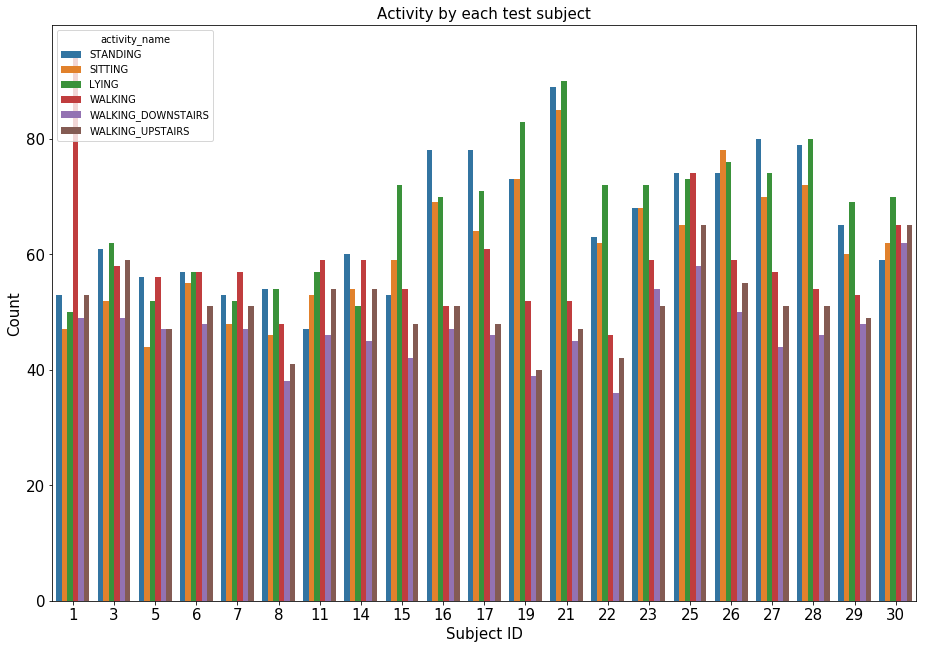

In [9]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject_id", hue = "activity_name", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

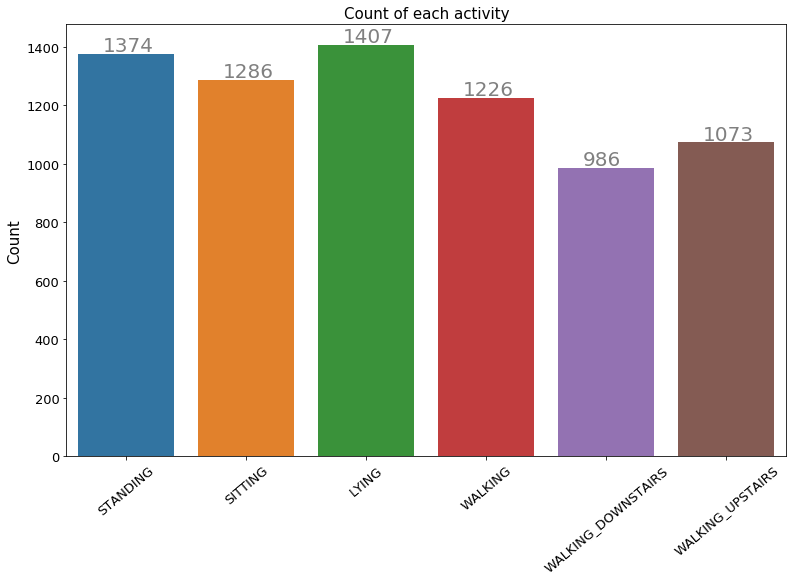

In [10]:

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity_name", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

##### Changine name of the feature

In [11]:
columns = train_df.columns

In [12]:
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')
#here, columns is of type pandas index. By writing "columns.str" we have changed its type to 
#pandas string. Pandas string has method called replace which we have used here.

train_df.columns = columns
test_df.columns = columns

In [13]:
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject_id', 'activity', 'activity_name'],
      dtype='object', length=564)

In [14]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [15]:
test_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [16]:
train_df.to_csv("./Data/train/train_df.csv", index = False)
test_df.to_csv("./Data/test/test_df.csv", index = False)

##### Exploratory Data Analysis

##### Feature information from domain knowledge

   1. Static: We have three types static features where test subject is in rest:
 *        Sitting
 *        Standing
 *        Lying
   2. Dynamic: We have three types of dynamic features where test subject is in motion:
 *        Walking
 *        Walking_Downstairs
 *        Walking_Upstairs

In [17]:
train_df = pd.read_csv("./Data/train/train_df.csv")
test_df = pd.read_csv("./Data/test/test_df.csv")

##### Magnitude of Body Accelerator Mean Matters

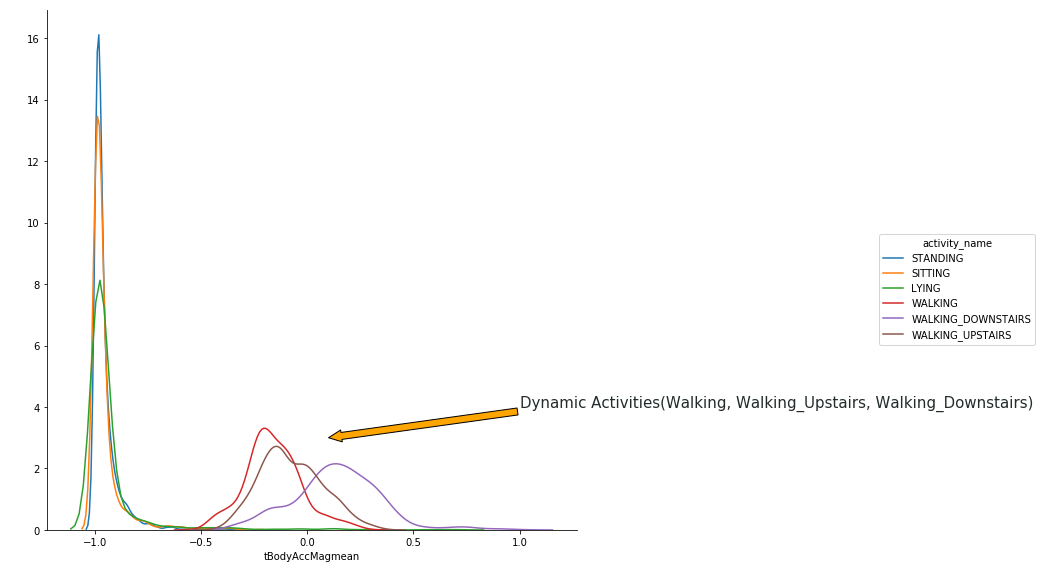

In [18]:
facetgrid = sns.FacetGrid(data = train_df, hue = "activity_name", size = 8)
facetgrid.map(sns.distplot, "tBodyAccMagmean", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(1, 4),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")
plt.show()

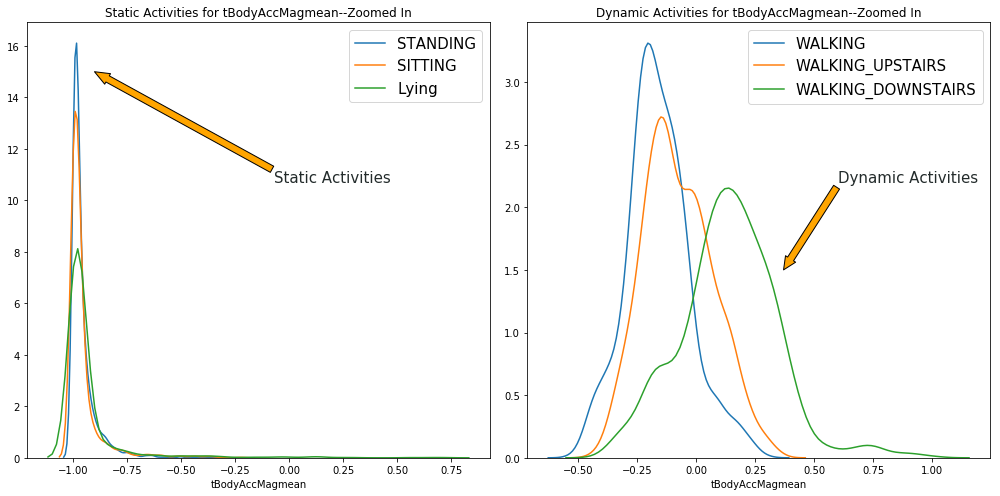

In [19]:
#let's plot "tBodyAccMagmean" for both static and dynamic activites separately to analysis them in more detail
df_standing = train_df[train_df["activity_name"] == "STANDING"]
df_sitting = train_df[train_df["activity_name"] == "SITTING"]
df_lying = train_df[train_df["activity_name"] == "LYING"]
df_walking = train_df[train_df["activity_name"] == "WALKING"]
df_walking_upstairs = train_df[train_df["activity_name"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["activity_name"] == "WALKING_DOWNSTAIRS"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))

axes[0].set_title("Static Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_standing["tBodyAccMagmean"], hist = False, label = "STANDING", ax = axes[0])
sns.distplot(df_sitting["tBodyAccMagmean"], hist = False, label = "SITTING", ax = axes[0])
sns.distplot(df_lying["tBodyAccMagmean"], hist = False, label = "Lying", ax = axes[0])
axes[0].legend(fontsize = 15)
axes[0].annotate('Static Activities', xy=(-0.90, 15), xytext=(-0.07, 10.7),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")

axes[1].set_title("Dynamic Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_walking["tBodyAccMagmean"], hist = False, label = "WALKING", ax = axes[1])
sns.distplot(df_walking_upstairs["tBodyAccMagmean"], hist = False, label = "WALKING_UPSTAIRS", ax = axes[1])
sns.distplot(df_walking_downstairs["tBodyAccMagmean"], hist = False, label = "WALKING_DOWNSTAIRS", ax = axes[1])
axes[1].legend(fontsize = 15)
axes[1].annotate('Dynamic Activities', xy=(0.37, 1.5), xytext=(0.60, 2.2),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")

plt.tight_layout()
plt.show()

##### Observation
From above two plots we can clearly observe that how well "tBodyAccMagmean"--which is the magnitude of the mean of body acceleration in time-domain meaured by accelerometer--is able to separate static activity from dynamic activity. This shows that features are very carefully engineered by domian experts.

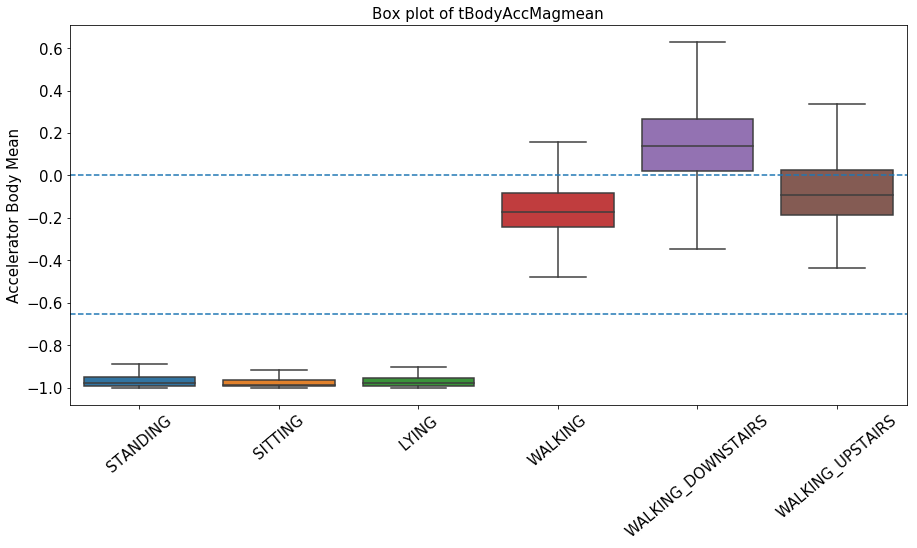

In [20]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_name", y = "tBodyAccMagmean", showfliers = False, data = train_df)
plt.axhline(y = -0.65, linestyle = "--")
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Body Mean", fontsize = 15)
plt.xlabel("Activity Name", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

##### Observations:

* If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
* If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
* If tAccMean > 0.0 then the Activity is WalkingDownstairs.
* We can classify 75% the Acitivity labels with some errors.

##### Accelerator Gravity Mean on X-axis can be quite important

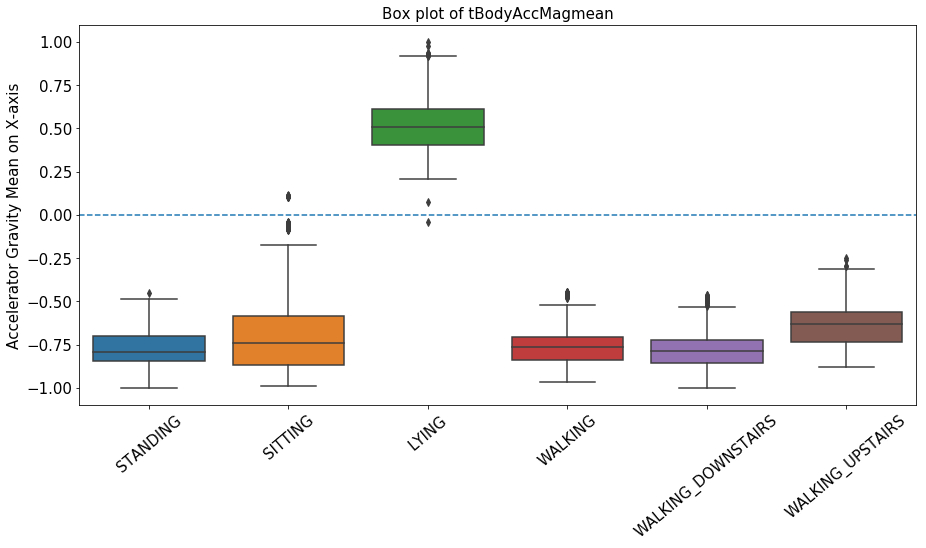

In [21]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_name", y = "angleXgravityMean", showfliers = True, data = train_df)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

##### Applying T-SNE on Data

In [22]:
def plt_tsne(perplexity, train_df):
    data = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
    data_label = train_df["activity_name"]
    applying_tsne = TSNE(n_components = 2, perplexity = perplexity, n_iter = 1000, verbose = 2)
    reduced_dim = applying_tsne.fit_transform(data)
    d = {'Dimension_1': applying_tsne.embedding_[:,0], 'Dimension_2': applying_tsne.embedding_[:,1], "activities":data_label}
    df = pd.DataFrame(data = d)
    print("Done...")
    print("Plotting TSNE Visualization...")
    sns.set_style('whitegrid') 
    sns.lmplot("Dimension_1", "Dimension_2", df, hue = 'activities', markers=['|','o','_', ">", "<", "^"], fit_reg = False, size = 10, scatter_kws={'s':100})
    plt.title("TSNE Plot for Perplexity "+str(perplexity))
    plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.239s...
[t-SNE] Computed neighbors for 7352 samples in 37.779s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.056s
[t-SNE] Iteration 50: error = 113.8983383, gradient norm = 0.0233091 (50 iterations in 21.995s)
[t-SNE] Iteration 100: error = 97.4711685, gradient norm = 0.0153273 (50 iterations in 5.978s)
[t-SNE] Iteration 150: error = 93.0891113, gradient norm 

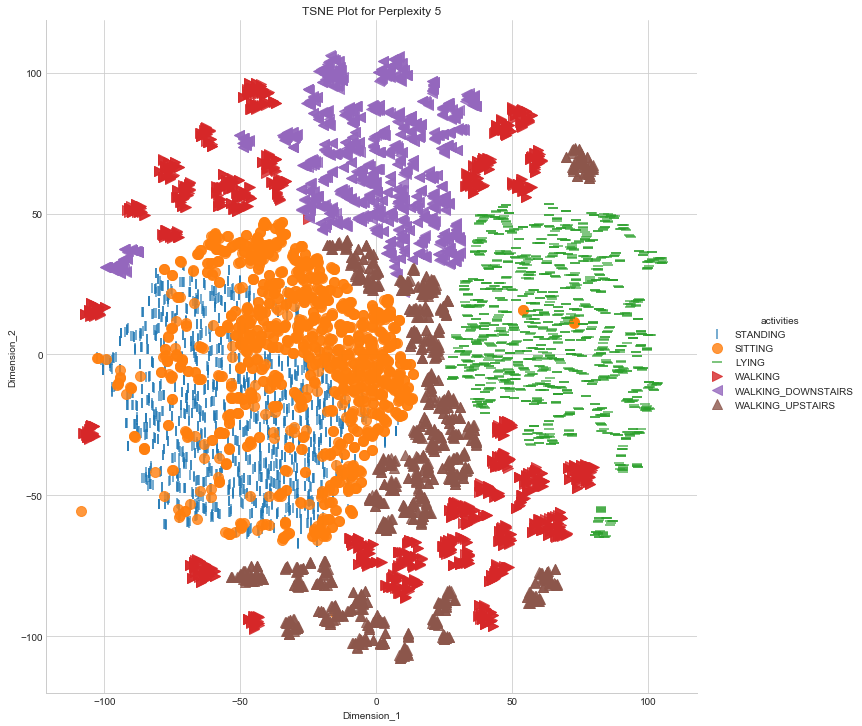

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.218s...
[t-SNE] Computed neighbors for 7352 samples in 37.409s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.095s
[t-SNE] Iteration 50: error = 105.9362640, gradient norm = 0.0155650 (50 iterations in 9.943s)
[t-SNE] Iteration 100: error = 90.6308975, gradient norm = 0.0105004 (50 iterations in 6.818s)
[t-SNE] Iteration 150: error = 87.3262787, gradient norm =

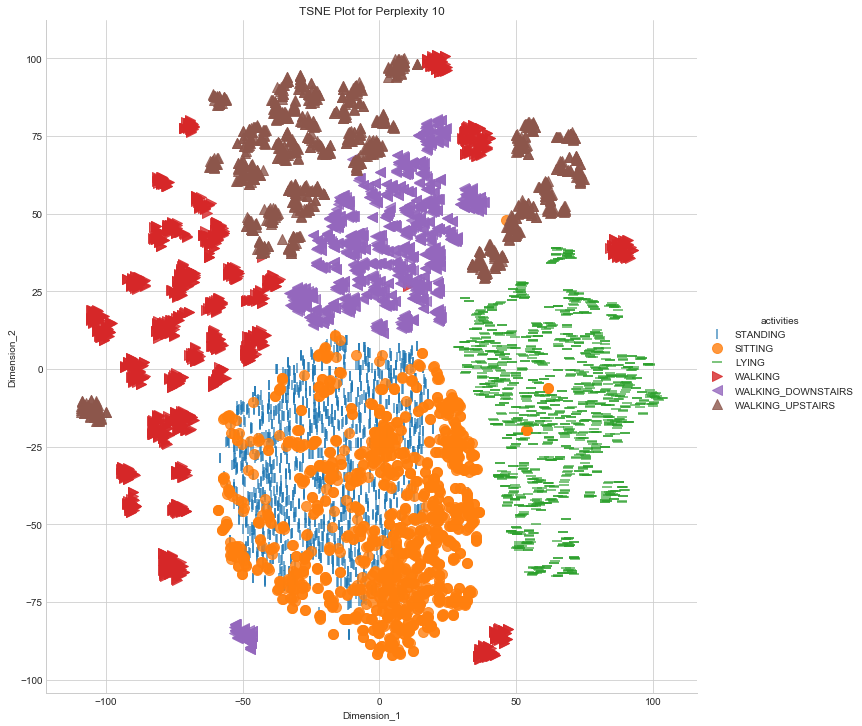

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.226s...
[t-SNE] Computed neighbors for 7352 samples in 38.656s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.166s
[t-SNE] Iteration 50: error = 96.6191940, gradient norm = 0.0265922 (50 iterations in 11.010s)
[t-SNE] Iteration 100: error = 83.6533585, gradient norm = 0.0076565 (50 iterations in 8.071s)
[t-SNE] Iteration 150: error = 81.7874298, gradient norm =

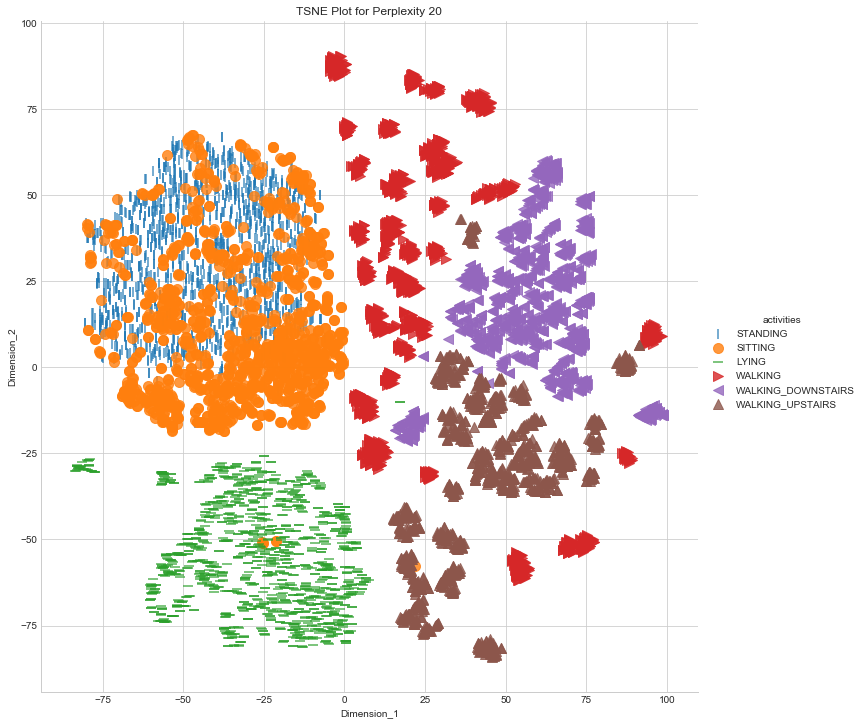

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.224s...
[t-SNE] Computed neighbors for 7352 samples in 39.937s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.399086
[t-SNE] Computed conditional probabilities in 0.325s
[t-SNE] Iteration 50: error = 89.9575424, gradient norm = 0.0041772 (50 iterations in 21.556s)
[t-SNE] Iteration 100: error = 78.0594177, gradient norm = 0.0054086 (50 iterations in 13.656s)
[t-SNE] Iteration 150: error = 76.5776672, gradient norm

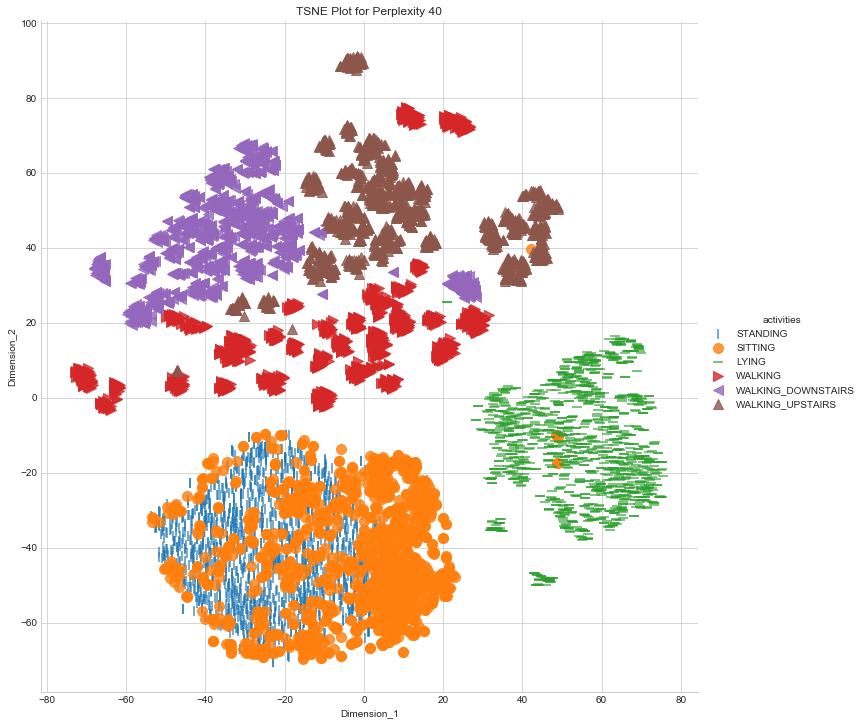

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.204s...
[t-SNE] Computed neighbors for 7352 samples in 37.675s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.559265
[t-SNE] Computed conditional probabilities in 0.764s
[t-SNE] Iteration 50: error = 77.1467972, gradient norm = 0.0274214 (50 iterations in 20.511s)
[t-SNE] Iteration 100: error = 68.2256546, gradient norm = 0.0035038 (50 iterations in 19.272s)
[t-SNE] Iteration 150: error = 67.6921692, gradient norm

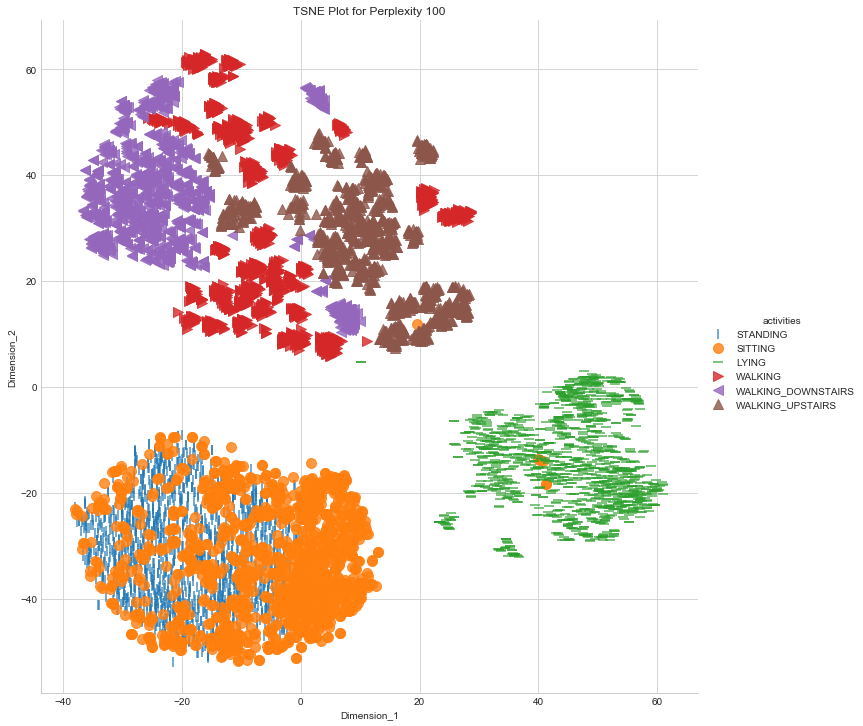

In [23]:
perplexities = [5, 10, 20, 40, 100]
for perplexity in perplexities:
    plt_tsne(perplexity, train_df)

##### Machine Learning Models

In [24]:
x_train = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_train = train_df["activity"]

x_test = test_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_test = test_df["activity"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [25]:
table = pd.DataFrame(columns = ["Model", "Accuracy(%)"])
def keeping_record(model_name, accuracy):
    global table
    table = table.append(pd.DataFrame([[model_name, accuracy]], columns = ["Model", "Accuracy(%)"]))
    table.reset_index(drop = True, inplace = True)

In [26]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [27]:
def apply_model(cross_val, x_train, y_train, x_test, y_test, model_name):
    start = datetime.now()
    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)
    
    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now() - start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print(str(accuracy)+"%\n")
    
    print('---------------------------')
    print('|      Best Estimator      |')
    print('---------------------------')
    print("{}\n".format(cross_val.best_estimator_))
    
    print('----------------------------------')
    print('|      Best Hyper-Parameters      |')
    print('----------------------------------')
    print(cross_val.best_params_)
    
    keeping_record(model_name, accuracy)
    
    print("\n\n")
    
    print_confusionMatrix(y_test, predicted_points)

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:02:32.759229

---------------------
|      Accuracy      |
---------------------
96.2%

---------------------------
|      Best Estimator      |
---------------------------
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 10, 'penalty': 'l2'}





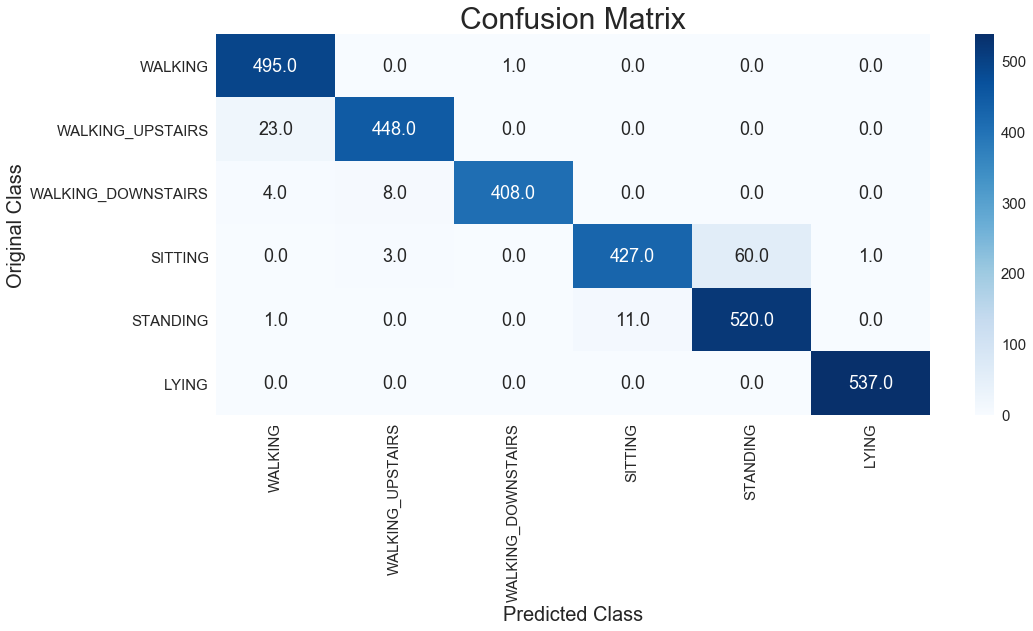

-----------------------------------------------------------------------------------------------------------------------------


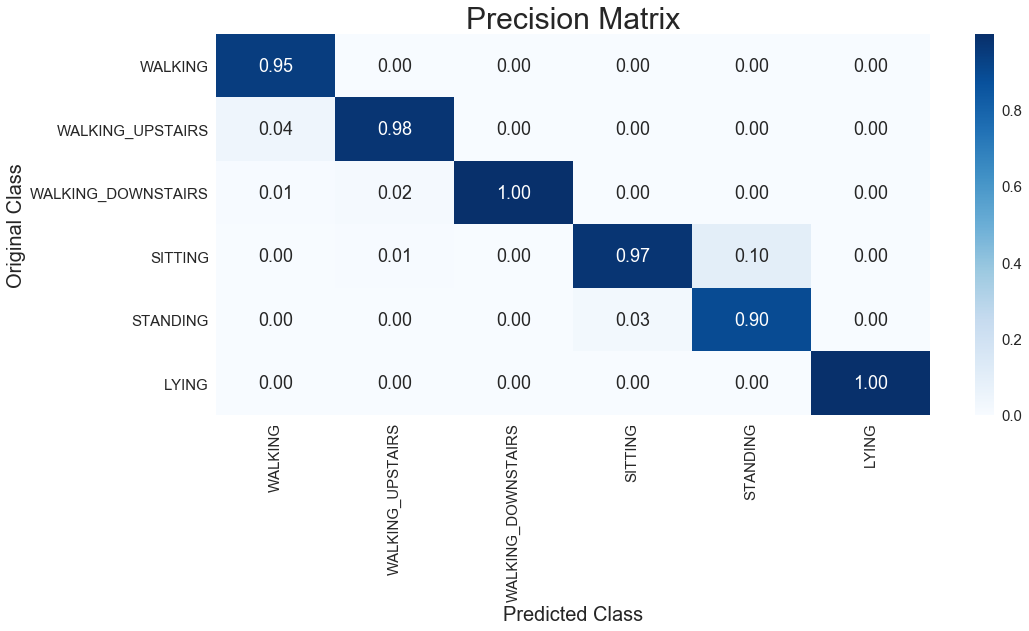

-----------------------------------------------------------------------------------------------------------------------------


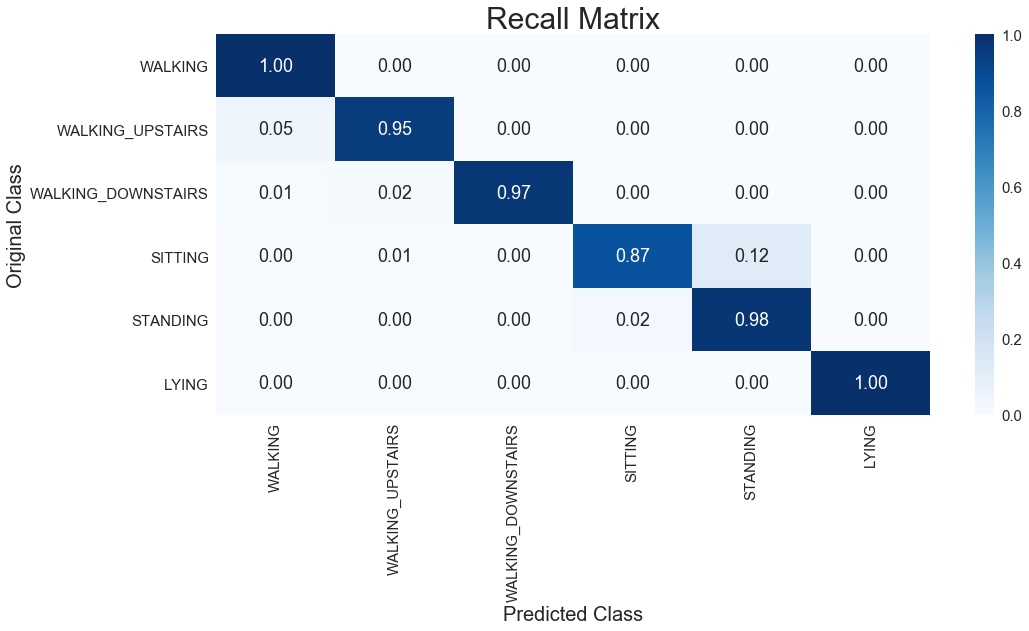

In [28]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3], "penalty": ["l1", "l2"]}
clf = LogisticRegression(multi_class = "ovr")
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Logistic Regression")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:05:18.906167

---------------------
|      Accuracy      |
---------------------
92.77%

---------------------------
|      Best Estimator      |
---------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'n_estimators': 400}





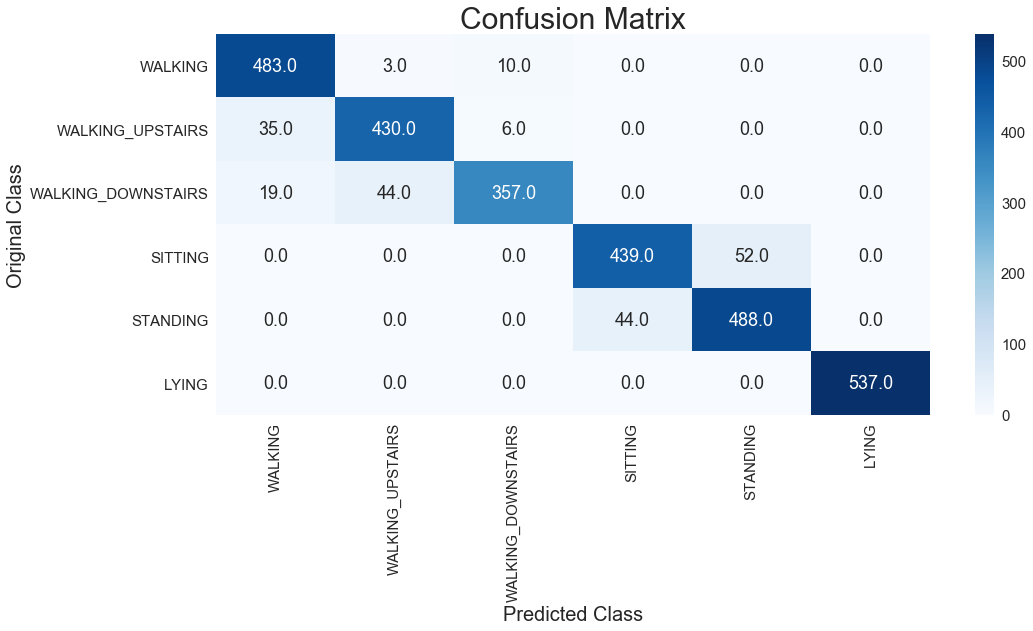

-----------------------------------------------------------------------------------------------------------------------------


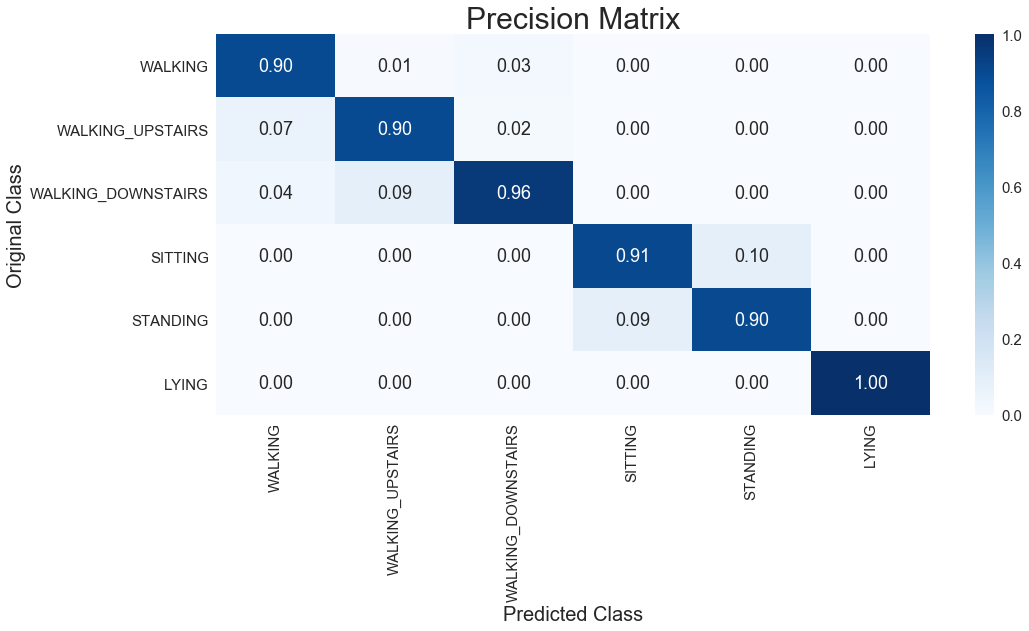

-----------------------------------------------------------------------------------------------------------------------------


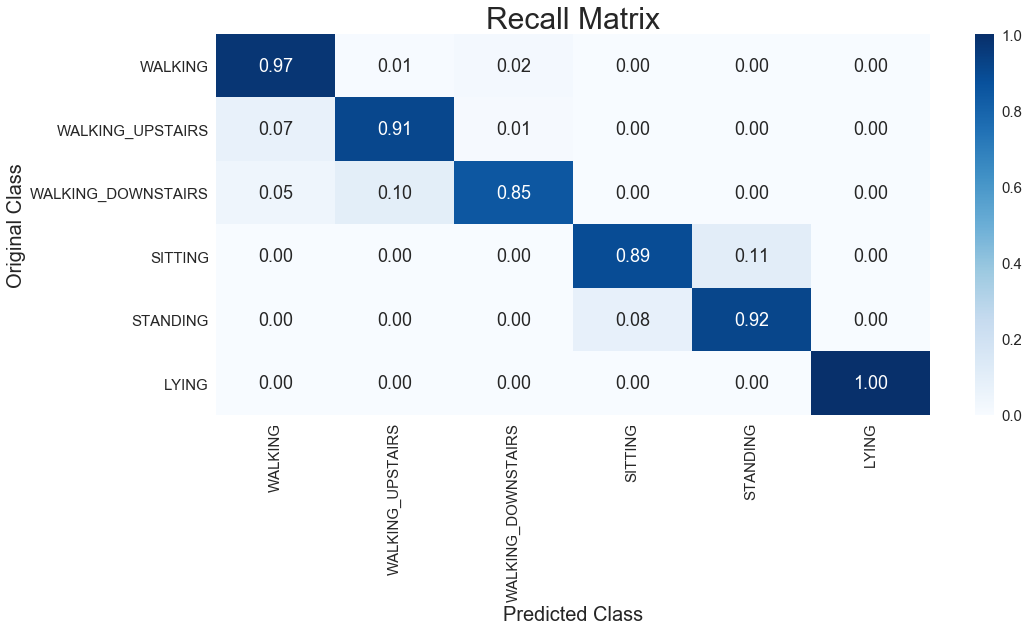

In [29]:
parameters = {"n_estimators": [50, 100, 200, 400, 800]}
clf = RandomForestClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Random Forest")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:10:23.500872

---------------------
|      Accuracy      |
---------------------
90.6%

---------------------------
|      Best Estimator      |
---------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'max_depth': 1, 'n_estimators': 100}





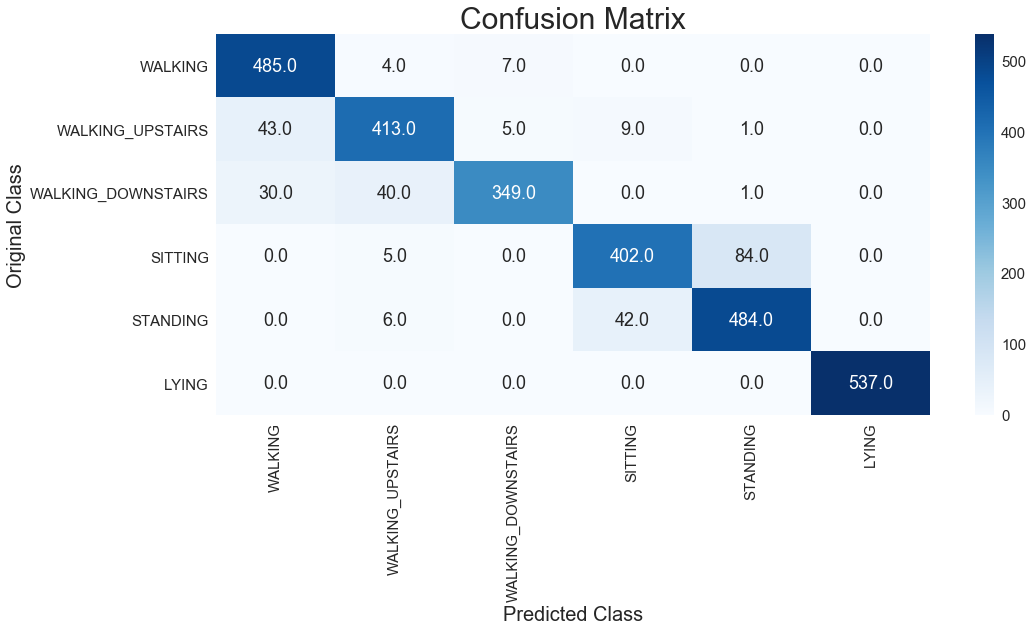

-----------------------------------------------------------------------------------------------------------------------------


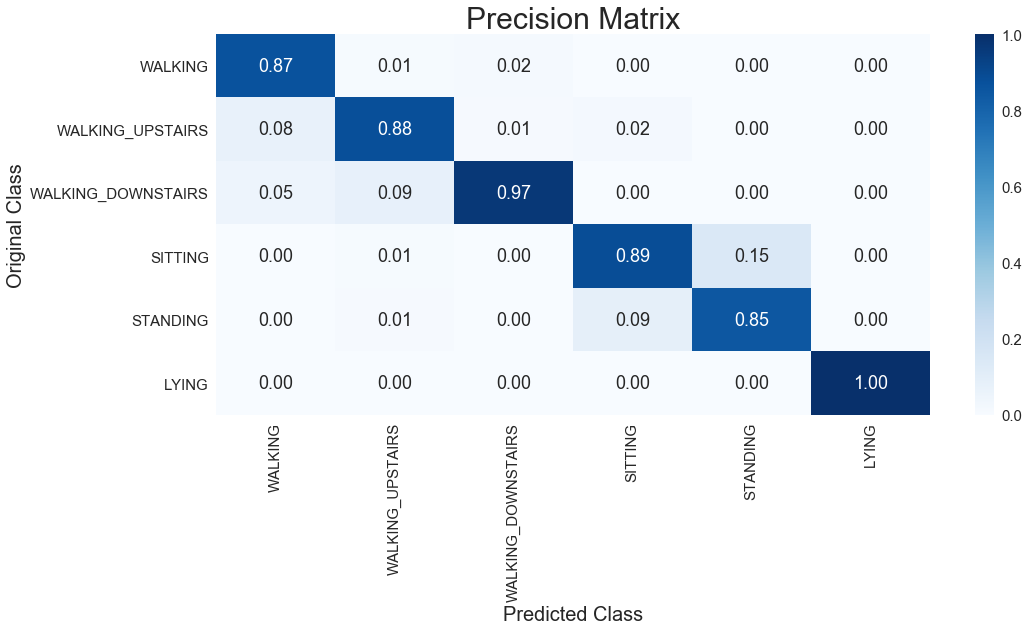

-----------------------------------------------------------------------------------------------------------------------------


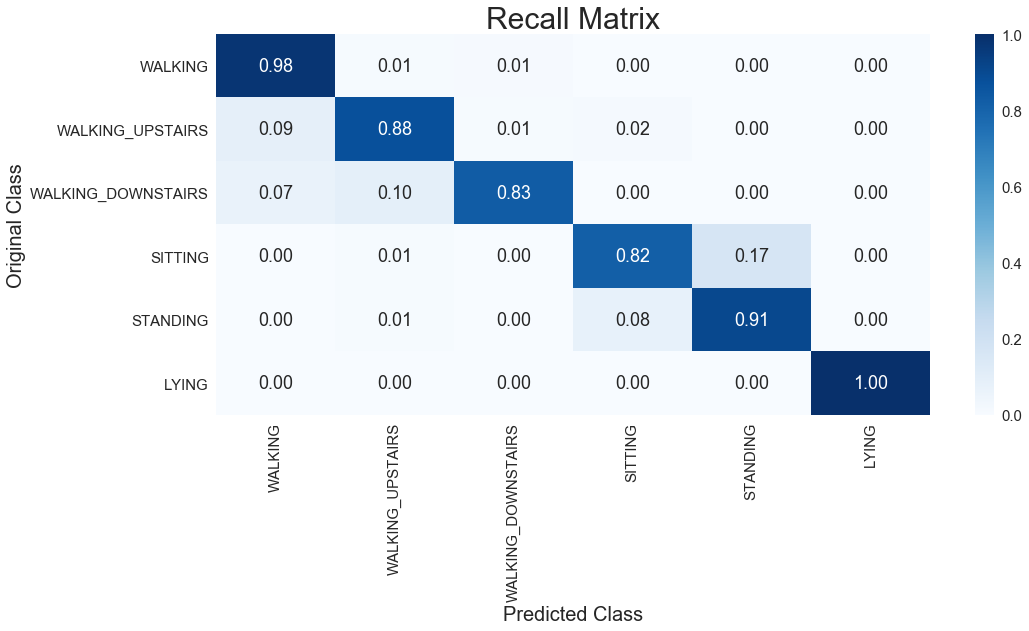

In [30]:
parameters = {"n_estimators": [50, 100], "max_depth":[1, 3]}
clf = GradientBoostingClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Gradient Boosted DT")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:45.142882

---------------------
|      Accuracy      |
---------------------
95.76%

---------------------------
|      Best Estimator      |
---------------------------
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 10}





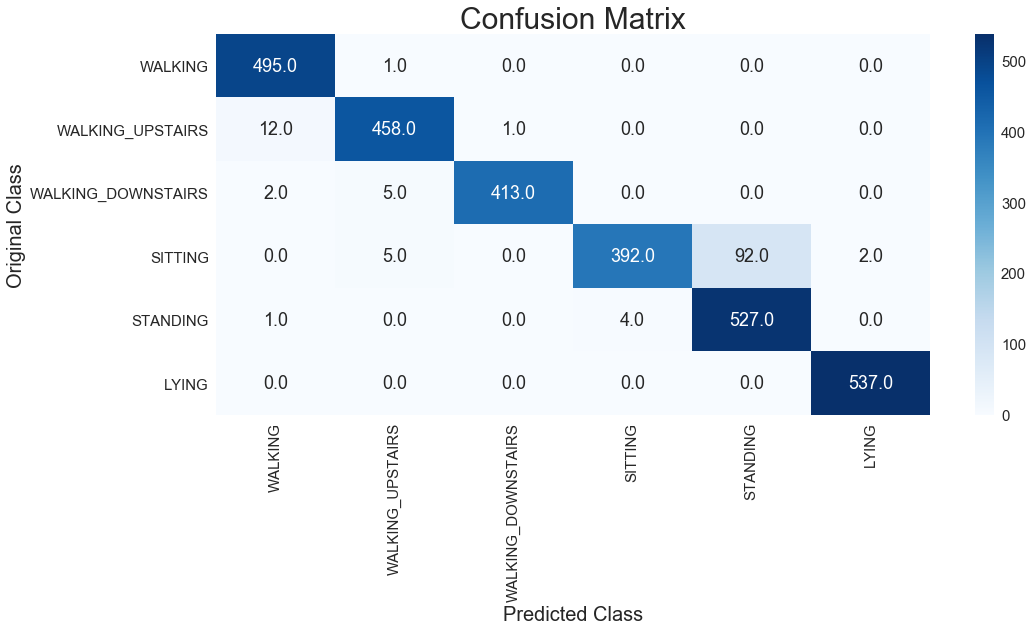

-----------------------------------------------------------------------------------------------------------------------------


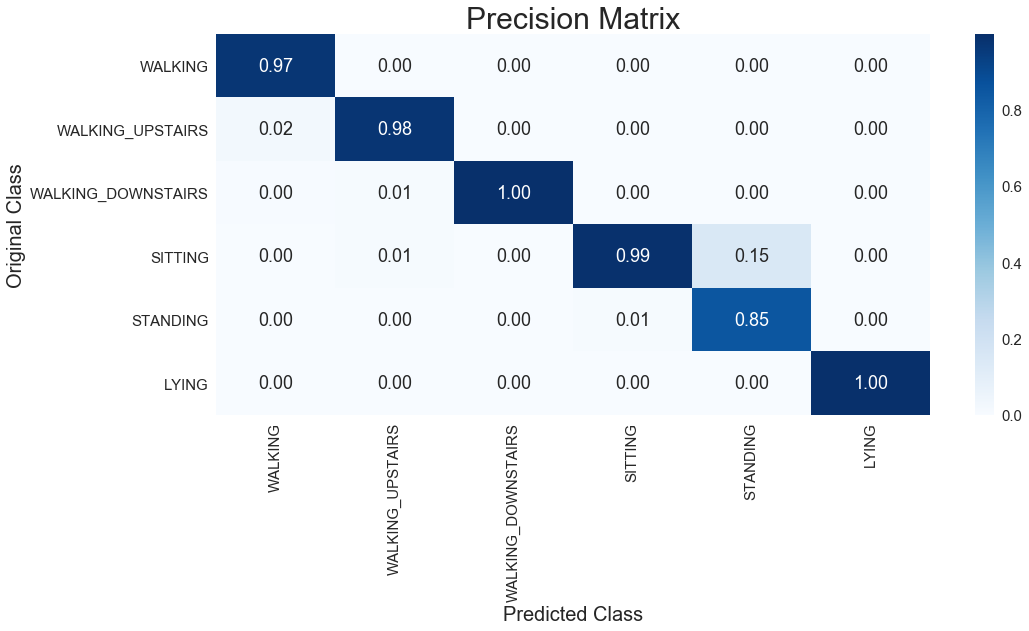

-----------------------------------------------------------------------------------------------------------------------------


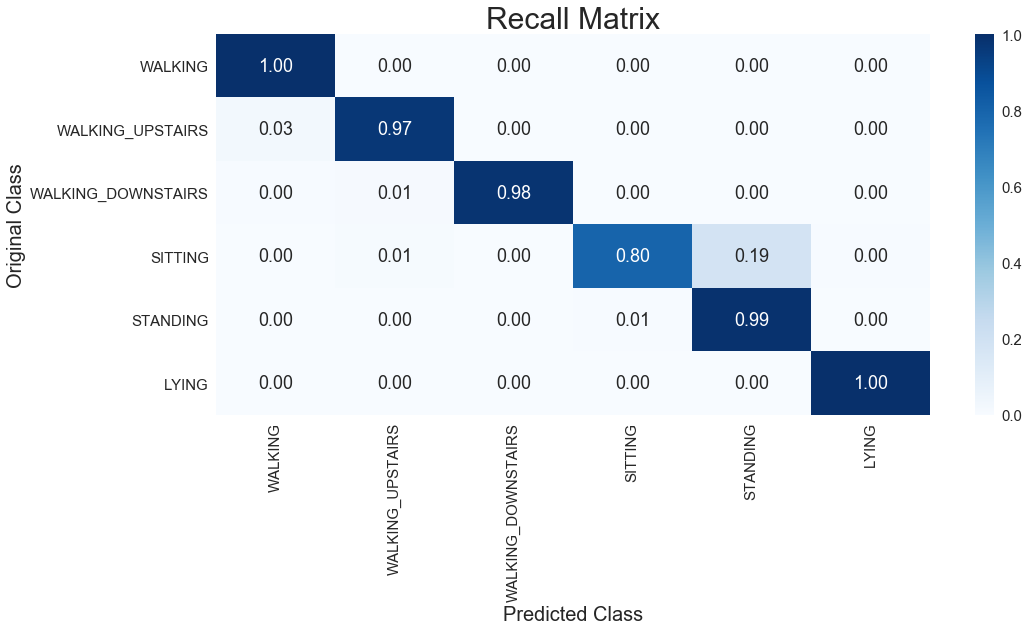

In [31]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
clf = LinearSVC()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Linear SVM")

In [32]:
all_signals_list = ["body_acc_x_", "body_acc_y_", "body_acc_z_", "body_gyro_x_", "body_gyro_y_", "body_gyro_z_", 
                   "total_acc_x_", "total_acc_y_", "total_acc_z_"]

In [33]:
def reading_data(filename):
    return pd.read_csv(filename, delim_whitespace = True, header = None)

In [34]:
def total_signal_matrix(trainOrTest):
    complete_data = []
    for signal in all_signals_list:
        complete_data.append(reading_data("./Data/"+ trainOrTest +"/Inertial Signals/"+ signal + trainOrTest +".txt").as_matrix())
    return np.transpose(complete_data, (1, 2, 0))

In [35]:
def load_labels(subset):
    filename = "./Data/"+subset+"/y_"+subset+".txt"
    y = reading_data(filename)
    return pd.get_dummies(y[0]).as_matrix()
# here, get_dummies takes pandas series as input and returns its one-hot encoded vector of each element in a series.

In [36]:
def load_full_data():
    x_train = total_signal_matrix("train")
    y_train = load_labels("train")
    x_test = total_signal_matrix("test")
    y_test = load_labels("test")
    return x_train, y_train, x_test, y_test

In [37]:
x_train, y_train, x_test, y_test = load_full_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 128, 9), (7352, 6), (2947, 128, 9), (2947, 6))

In [38]:
np.save("./Data/train", x_train)
np.save("./Data/train_label", y_train)
np.save("./Data/test", x_test)
np.save("./Data/test_label", y_test)

In [39]:
def data():
    x_train = np.load("./Data/train.npy")
    y_train = np.load("./Data/train_label.npy")
    x_test = np.load("./Data/test.npy")
    y_test = np.load("./Data/test_label.npy")
    return x_train, y_train, x_test, y_test

In [40]:

#this function will return number of classes
def count_unique_classes(y_train):
    return len(set([tuple(a) for a in y_train]))


In [41]:
def create_model(x_train, y_train, x_test, y_test):
    
    epochs = 8
    batch_size = 32
    timesteps = x_train.shape[1]
    input_dim = len(x_train[0][0])
    n_classes = 6
    
    model = Sequential()
    
    model.add(LSTM(64, return_sequences = True, input_shape = (timesteps, input_dim)))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(LSTM({{choice([32, 16])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(n_classes, activation='sigmoid'))
    
    print(model.summary())
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    result = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=2, validation_split=0.01)
    
    validation_acc = np.amax(result.history['val_acc']) 
    
    print('Best validation acc of epoch:', validation_acc)
    
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.manifold import TSNE
except:
    pass

try:
    import warnings
except:
    pass

try:
    from datetime import datetime
except:
    pass

try:
    from sklearn.model_selection import GridSearchCV
except:
    pass

try:
    from sklearn.metrics import confusion_matrix
except:
    pass

try:
    from sklearn.metrics import accuracy_score
except:
    pass

try:
    from sklearn.linear_model import LogisticRegression
except:
    pass

try:
    from sklearn.svm import LinearSVC
except:
    pass

try:
    from sklearn.svm import SVC
except:
    pass

try:
    from sklearn.tree import DecisionTreeClassifier
except:
    pass

try:
    from sklearn.ensemble import RandomForestClassifier
except:
    pass

try:
    from sklearn.ensemble import Gradi

dropout_5 (Dropout)          (None, 128, 64)           0          
_________________________________________________________________ 
lstm_6 (LSTM)                (None, 16)                5184       
_________________________________________________________________ 
dropout_6 (Dropout)          (None, 16)                0          
_________________________________________________________________ 
dense_3 (Dense)              (None, 6)                 102        
Total params: 24,230                                              
Trainable params: 24,230                                          
Non-trainable params: 0                                           
_________________________________________________________________ 
None                                                              
Train on 7278 samples, validate on 74 samples                     
Epoch 1/8                                                         
 - 37s - loss: 1.5143 - acc: 0.3975 - val_loss: 1.5616 - val_a

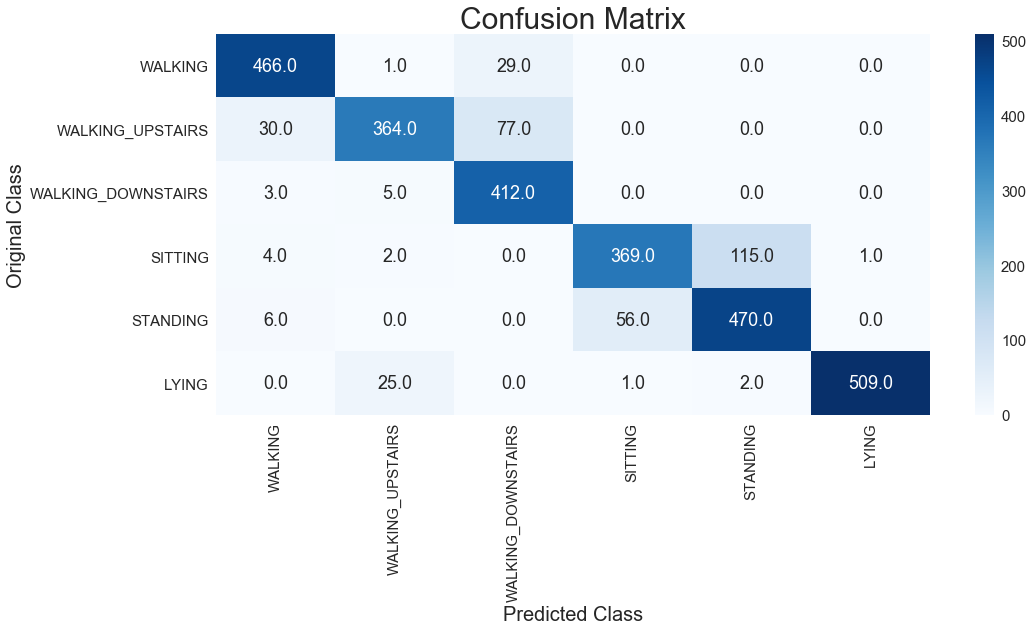

-----------------------------------------------------------------------------------------------------------------------------


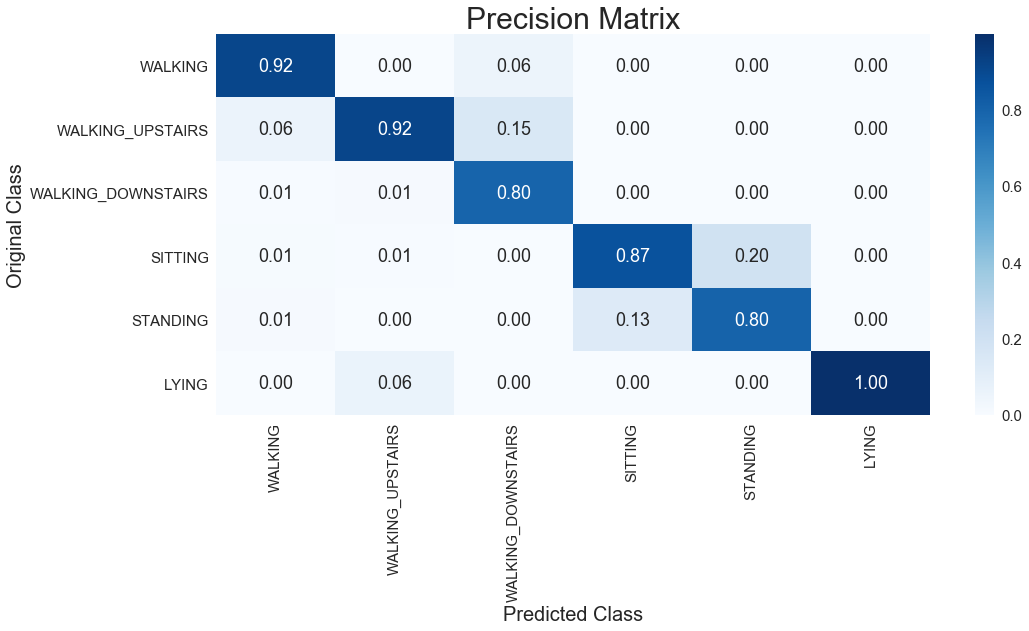

-----------------------------------------------------------------------------------------------------------------------------


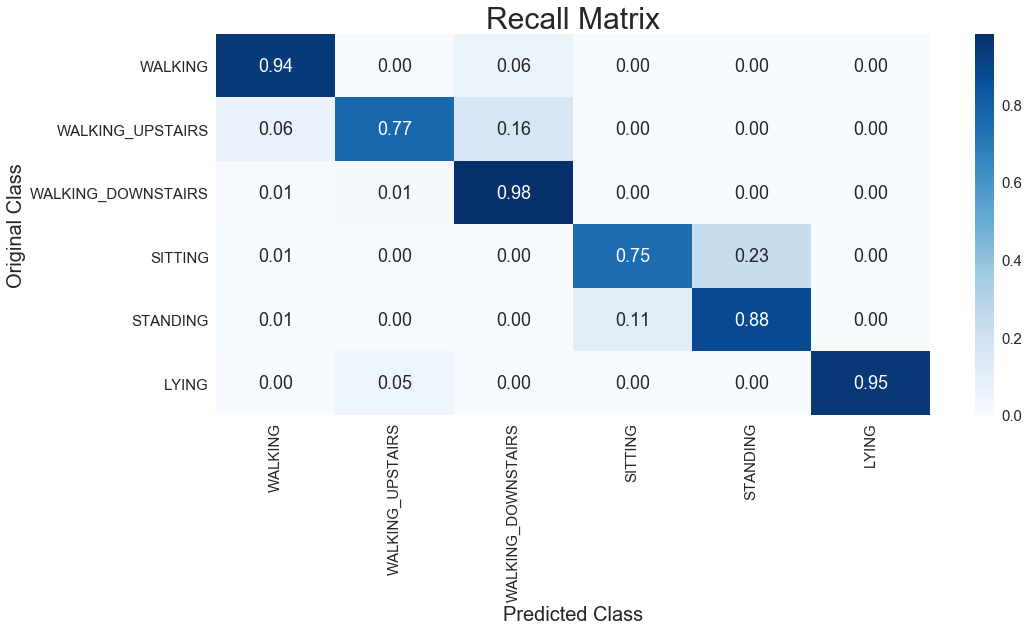

In [42]:
best_run, best_model = optim.minimize(model=create_model, data=data, algo=tpe.suggest, max_evals=4, trials=Trials(), notebook_name = "csc275_proj")
x_train, y_train, x_test, y_test = data()

score = best_model.evaluate(x_test, y_test)

print('---------------------')
print('|      Accuracy      |')
print('---------------------')
acc = np.round((score[1]*100), 2)
print(str(acc)+"%\n")
    
print('----------------------------------')
print('|      Best Hyper-Parameters      |')
print('----------------------------------')
print(best_run)
print("\n\n")

true_labels = [np.argmax(i)+1 for i in y_test]
predicted_probs = best_model.predict(x_test)
predicted_labels = [np.argmax(i)+1 for i in predicted_probs]
print_confusionMatrix(true_labels, predicted_labels)